#RESNET

##Download Data

In [ ]:
!cp -r "/content/drive/MyDrive/splitted" /content/


##PreProcessing

In [ ]:
data_source = "/content/splitted"

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

img_size = (224, 224)
batch_size = 32
num_classes = 10

train_data = os.path.join(data_source, "train")

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True
)

train_gen = datagen.flow_from_directory(
    train_data,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    train_data,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)


Found 3356 images belonging to 10 classes.
Found 834 images belonging to 10 classes.


##Train

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models

base = ResNet50(
    include_top=False,
    weights="imagenet",
    input_shape=(224,224,3)
)
base.trainable = False

x = layers.GlobalAveragePooling2D()(base.output)
x = layers.Dense(256, activation="relu")(x)
output = layers.Dense(10, activation="softmax")(x)

model_resnet = models.Model(inputs=base.input, outputs=output)

model_resnet.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

history = model_resnet.fit(train_gen, validation_data=val_gen, epochs=10)


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 82s 624ms/step - accuracy: 0.3559 - loss: 1.8284 - val_accuracy: 0.5707 - val_loss: 1.2660
Epoch 2/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 51s 482ms/step - accuracy: 0.6743 - loss: 1.0092 - val_accuracy: 0.6918 - val_loss: 0.9528
Epoch 3/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 51s 489ms/step - accuracy: 0.7632 - loss: 0.7543 - val_accuracy: 0.6811 - val_loss: 0.9109
Epoch 4/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 51s 489ms/step - accuracy: 0.7841 - loss: 0.6462 - val_accuracy: 0.7662 - val_loss: 0.7430
Epoch 5/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 51s 483ms/step - accuracy: 0.8303 - loss: 0.5576 - val_accuracy: 0.7830 - val_loss: 0.6594
Epoch 6/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 50s 479ms/step - accuracy: 0.8217 - loss: 0.5279 - val_accuracy: 0.7746 - val_loss: 0.6325
Epoch 7/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 52s 492ms/step - accuracy: 0.8450 - loss: 0.4884 - val_accuracy: 0.7482 - val_loss: 0.7000
Epoch 8/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 51s 491ms/step - accuracy: 0.8476 - loss: 0

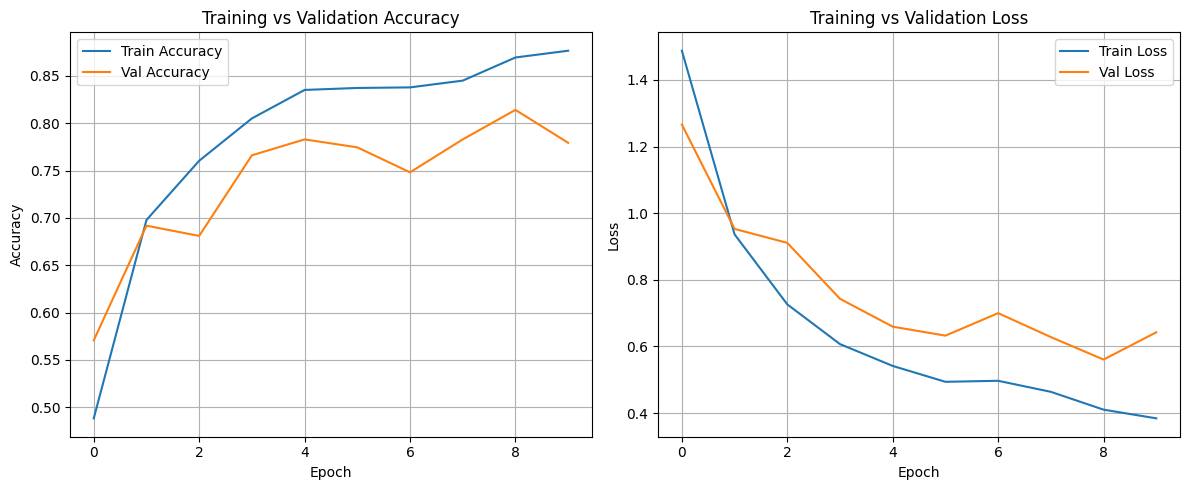

In [ ]:
import matplotlib.pyplot as plt

# Accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Val Accuracy")
plt.title("Training vs Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.title("Training vs Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


##Evaluation and visualization

> Add blockquote



In [ ]:
test_data = os.path.join(data_source, "test")

test_datagen = ImageDataGenerator(rescale=1./255)

test_gen = test_datagen.flow_from_directory(
    test_data,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False
)


Found 1053 images belonging to 10 classes.


In [ ]:
import numpy as np

test_gen.reset()

y_test_prob = model_resnet.predict(test_gen, verbose=1)
y_test_pred = np.argmax(y_test_prob, axis=1)
y_test_true = test_gen.classes

class_names = list(test_gen.class_indices.keys())
num_classes = len(class_names)


33/33 ━━━━━━━━━━━━━━━━━━━━ 13s 271ms/step


In [ ]:
from sklearn.metrics import classification_report, accuracy_score

test_accuracy = accuracy_score(y_test_true, y_test_pred)
print("Test Accuracy:", test_accuracy)

print("\nTest Classification Report:")
print(classification_report(
    y_test_true,
    y_test_pred,
    target_names=class_names,
    digits=4
))


Test Accuracy: 0.9468186134852802

Test Classification Report:
                 precision    recall  f1-score   support

        call_me     0.9434    0.9434    0.9434       106
fingers_crossed     0.8448    0.9703    0.9032       101
           okay     0.9727    0.9907    0.9817       108
          paper     1.0000    0.9444    0.9714       108
          peace     0.8908    1.0000    0.9422       106
           rock     1.0000    0.8725    0.9319       102
        rock_on     1.0000    0.9813    0.9906       107
        scissor     0.9083    0.9340    0.9209       106
         thumbs     0.9592    0.8704    0.9126       108
             up     0.9798    0.9604    0.9700       101

       accuracy                         0.9468      1053
      macro avg     0.9499    0.9467    0.9468      1053
   weighted avg     0.9503    0.9468    0.9470      1053



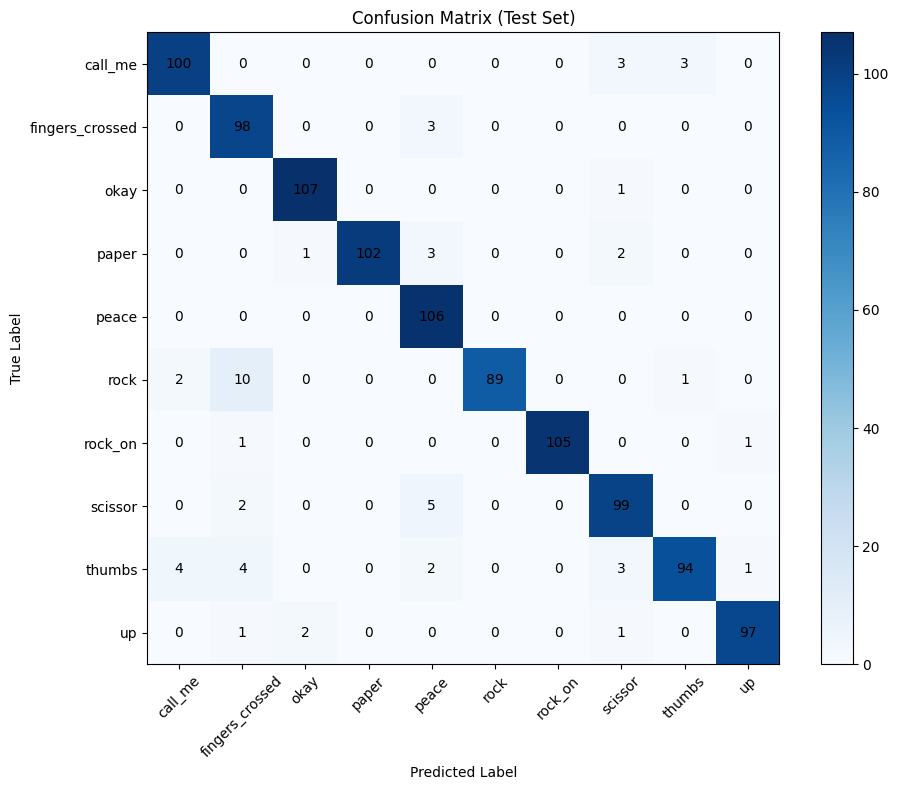

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test_true, y_test_pred)

plt.figure(figsize=(10, 8))
plt.imshow(cm, cmap="Blues")   # 🔹 try: "Greens", "Oranges", "Purples"
plt.title("Confusion Matrix (Test Set)")
plt.colorbar()
plt.xticks(range(num_classes), class_names, rotation=45)
plt.yticks(range(num_classes), class_names)

for i in range(num_classes):
    for j in range(num_classes):
        plt.text(j, i, cm[i, j], ha="center", va="center")

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()


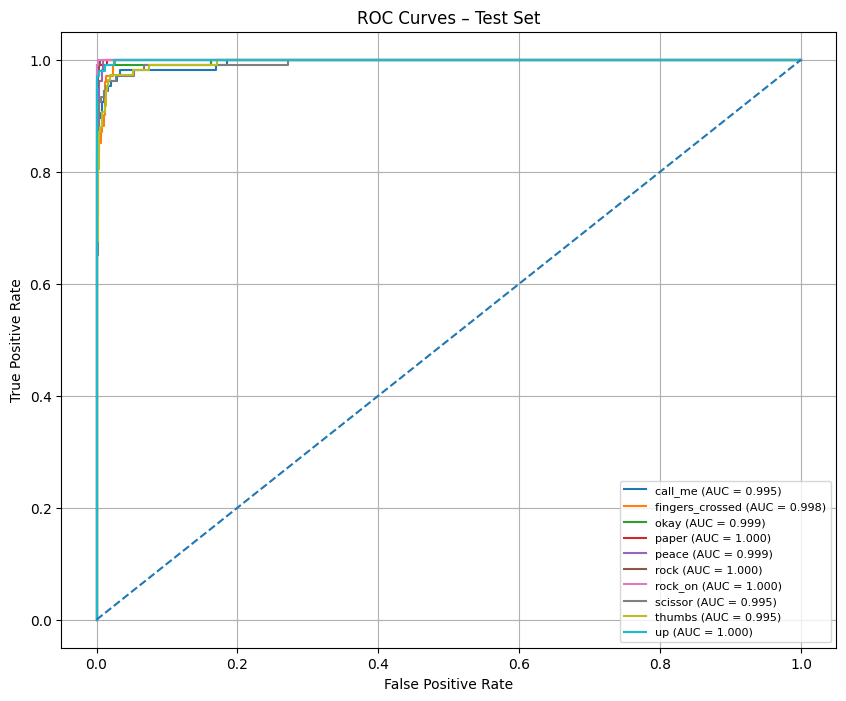

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

y_test_bin = label_binarize(y_test_true, classes=range(num_classes))

plt.figure(figsize=(10, 8))

for i in range(num_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_test_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{class_names[i]} (AUC = {roc_auc:.3f})")

plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves – Test Set")
plt.legend(loc="lower right", fontsize=8)
plt.grid()
plt.show()


##save

In [ ]:
model_resnet.save("/content/drive/MyDrive/DL_Colabs/RESNET_transfer.keras")
